In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
car = pd.read_csv('/content/drive/MyDrive/Train_Dataset.csv')
car.head(5)

<ipython-input-3-0140ec0cbc17>:1: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types. Specify dtype option on import or set low_memory=False.
  car = pd.read_csv('/content/drive/MyDrive/Train_Dataset.csv')


,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [ ]:
car.isnull().sum()

,0
ID,0
Client_Income,3607
Car_Owned,3581
Bike_Owned,3624
Active_Loan,3635
House_Own,3661
Child_Count,3638
Credit_Amount,3632
Loan_Annuity,4812
Accompany_Client,1746


#Population_Region_Relative

In [ ]:
car['Population_Region_Relative'] = pd.to_numeric(car['Population_Region_Relative'], errors='coerce')
mean_population = car['Population_Region_Relative'].mean()
car['Population_Region_Relative'] = car['Population_Region_Relative'].fillna(mean_population)


In [ ]:
#finding out % of null values in each coloumns
(car.isnull().sum()/len(car))*100

,0
ID,0.000000
Client_Income,2.960051
Car_Owned,2.938715
Bike_Owned,2.974002
Active_Loan,2.983029
House_Own,3.004366
Child_Count,2.985491
Credit_Amount,2.980567
Loan_Annuity,3.948923
Accompany_Client,1.432839


#Phone_Change

In [ ]:
phone_change_median = car['Phone_Change'].median()
car['Phone_Change'] = car['Phone_Change'].fillna(phone_change_median)

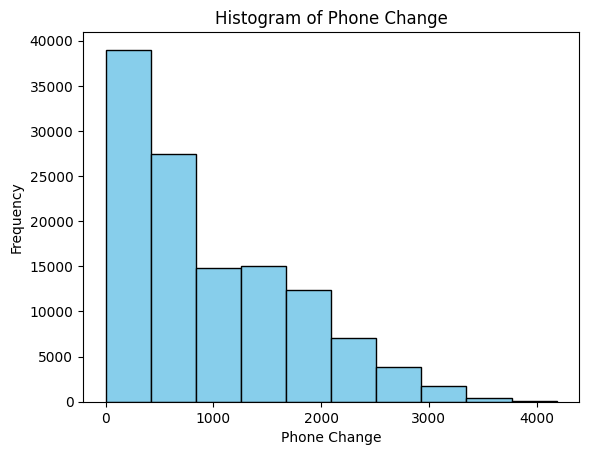

In [ ]:
plt.hist(car['Phone_Change'], bins=10, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Phone Change')
plt.ylabel('Frequency')
plt.title('Histogram of Phone Change')

# Show plot
plt.show()

#Client_Income
1.caterogerical is converted into numerical
and MV is assigned as NAN

2.Nan replaced with medium

In [ ]:
#the client_coloumn is object and is converted into numerical
car['Client_Income'] = car['Client_Income'].replace('$', '').replace('', np.nan).astype(float)


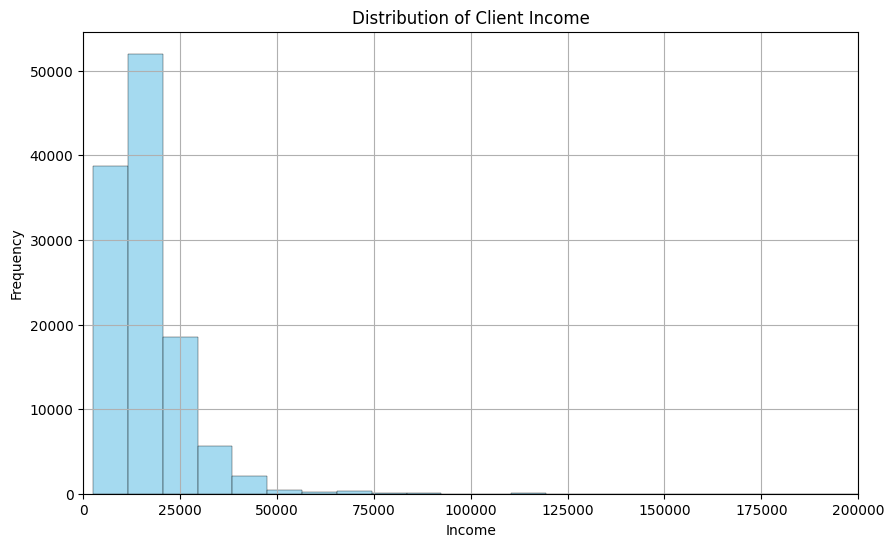

In [ ]:
import seaborn as sns

# Assuming 'car' is your DataFrame
plt.figure(figsize=(10, 6))
sns.histplot(car['Client_Income'].dropna(), bins=200, color='skyblue', edgecolor='black')
plt.title('Distribution of Client Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.xlim(0, 200000)  # Adjust the limits according to your data
plt.grid(True)
plt.show()

# plt.boxplot(car['Client_Income'])

In [ ]:
car['Client_Income'].fillna(car['Client_Income'].median(), inplace=True)


#Car_Owned
integer, only 0 and 1 are present

Nan is conversted into most dominating varaiable

In [ ]:
car['Car_Owned'].value_counts()

,count
Car_Owned,
0.0,77724
1.0,40551


In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'car'

# Calculate the mode of the 'Car_Owned' column
mode_car_owned = car['Car_Owned'].mode()[0]  # [0] is used to extract the mode value

# Replace missing values with the mode
car['Car_Owned'].fillna(mode_car_owned, inplace=True)

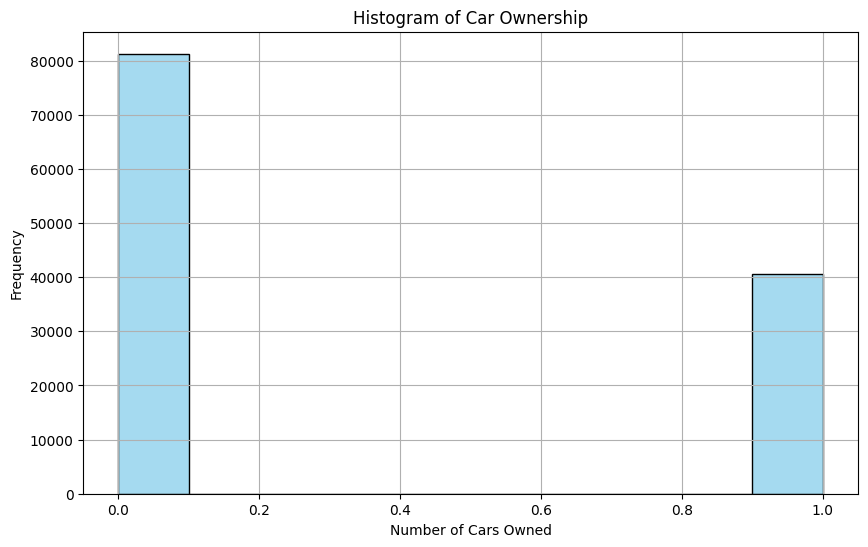

In [ ]:
import seaborn as sns

# Assuming 'car' is your DataFrame
plt.figure(figsize=(10, 6))
sns.histplot(car['Car_Owned'].dropna(), bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Car Ownership')
plt.xlabel('Number of Cars Owned')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


#Bike_Owned

1.integer only 0 and 1 are present.

2.Nan is replaced with most dominating varaible

In [ ]:
mode_Bike_Owned = car['Bike_Owned'].mode()[0]
car['Bike_Owned'].fillna(mode_Bike_Owned, inplace=True)

In [ ]:
# import pandas as pd

# # Your correlation matrix (assuming it's stored in a DataFrame)
# correlation_matrix = car.corr()

# # Define the correlation threshold (e.g., 0.7 or -0.7)
# threshold = 0.8

# # Create a boolean mask for significant correlations
# mask = (correlation_matrix.abs() > threshold) & (correlation_matrix != 1)  # Exclude self-correlation

# # Identify columns to remove
# columns_to_remove = [col for col in mask.columns if any(mask[col])]

# #print the names
# print(columns_to_remove)


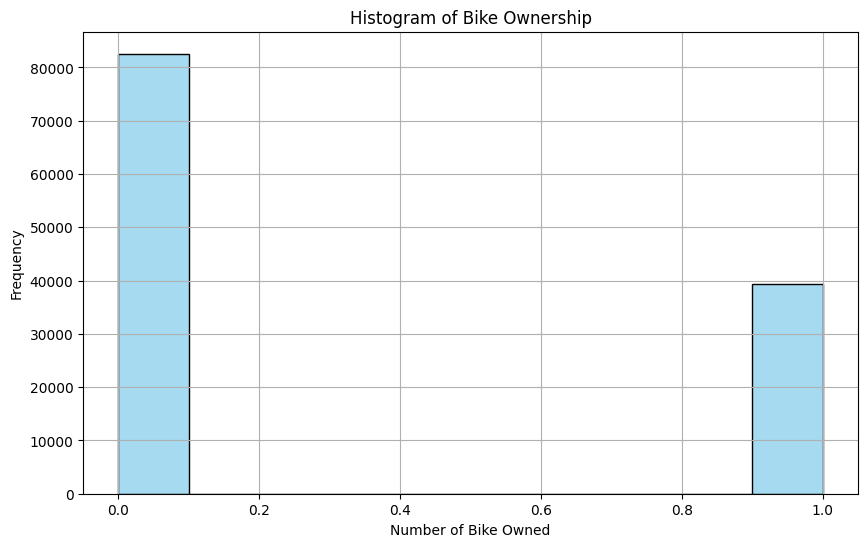

In [ ]:
import seaborn as sns

# Assuming 'Bike' is your DataFrame
plt.figure(figsize=(10, 6))
sns.histplot(car['Bike_Owned'].dropna(), bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Bike Ownership')
plt.xlabel('Number of Bike Owned')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


#Active_Loan
##have to drop that

In [ ]:
car['Active_Loan'].value_counts()


,count
Active_Loan,
0.0,59208
1.0,59013


In [ ]:

dominating_active_loan = car['Active_Loan'].mode()[0]
car['Active_Loan'] = car['Active_Loan'].fillna(dominating_active_loan)


#House_Own

1.integer only 0and 1.

2.Nan is replaced with most dominating varaible

In [ ]:

mode_House_Own = car['House_Own'].mode()[0]
car['House_Own'].fillna(mode_House_Own, inplace=True)

car['House_Own'].value_counts()

,count
House_Own,
1.0,85459
0.0,36397


#Child_Count

1.contains numerical data.

2.Nan is replaced with most dominating value

In [ ]:

mode_Child_Count = car['Child_Count'].mode()[0]
car['Child_Count'].fillna(mode_Child_Count, inplace=True)

car['Child_Count'].value_counts()

,count
Child_Count,
0.0,86472
1.0,23431
2.0,10294
3.0,1430
4.0,167
5.0,34
6.0,12
7.0,4
14.0,4


#Credit_Amount

NaN is replaced with medium value

In [ ]:
 car['Credit_Amount'] = car['Credit_Amount'].replace('$', '').replace('', np.nan).astype(float)

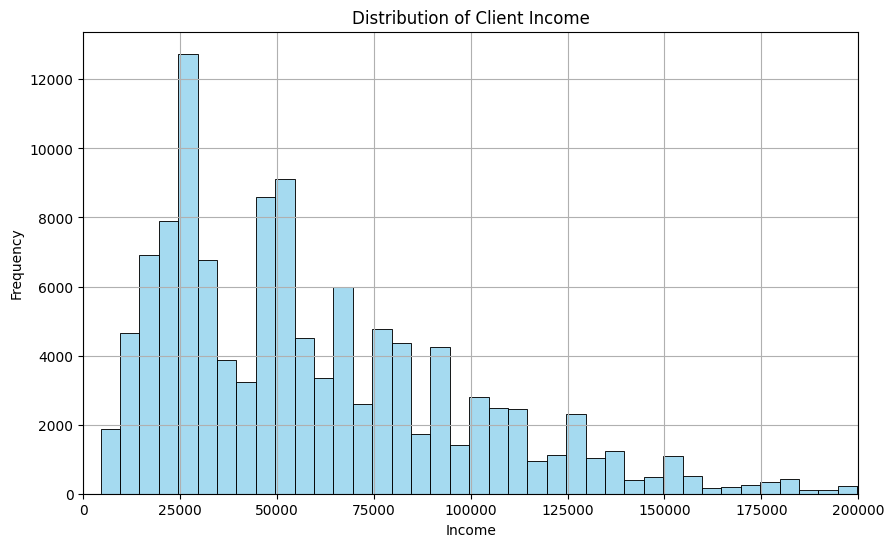

In [ ]:
import seaborn as sns

# Assuming 'car' is your DataFrame
plt.figure(figsize=(10, 6))
sns.histplot(car['Credit_Amount'].dropna(), bins=80, color='skyblue', edgecolor='black')
plt.title('Distribution of Client Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.xlim(0, 200000)  # Adjust the limits according to your data
plt.grid(True)
plt.show()

# plt.boxplot(car['Client_Income'])

In [ ]:
car['Credit_Amount'].median()

51750.0

In [ ]:
car['Credit_Amount'].fillna(car['Credit_Amount'].median(), inplace=True)

#Loan_Annuity

In [ ]:
 car['Loan_Annuity'] = car['Loan_Annuity'].replace(['$', '#VALUE!', ''],np.nan).astype(float)
 #car[car['Loan_Annuity']=='#VALUE!']

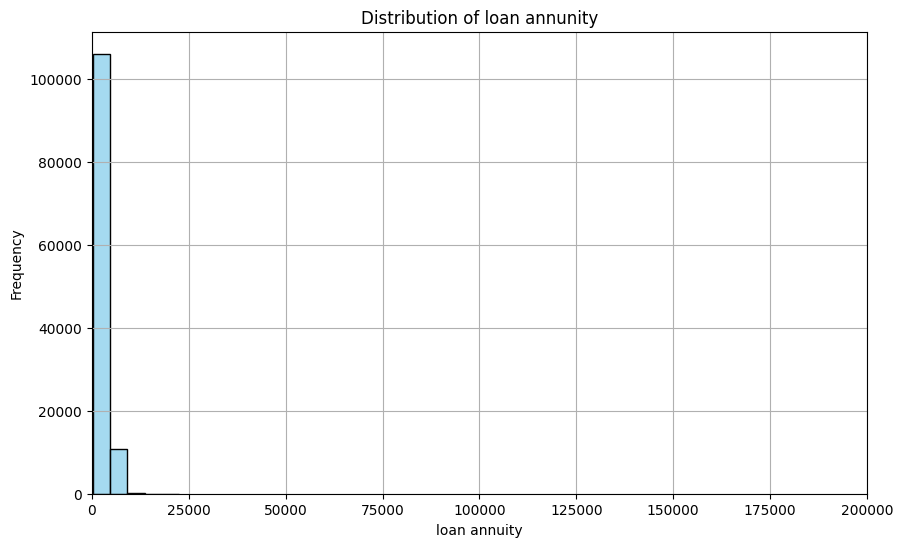

In [ ]:
import seaborn as sns

# Assuming 'car' is your DataFrame
plt.figure(figsize=(10, 6))
sns.histplot(car['Loan_Annuity'].dropna(), bins=5, color='skyblue', edgecolor='black')
plt.title('Distribution of loan annunity')
plt.xlabel('loan annuity')
plt.ylabel('Frequency')
plt.xlim(0, 200000)  # Adjust the limits according to your data
plt.grid(True)
plt.show()

In [ ]:
# Assuming 'car' is your DataFrame
car['Loan_Annuity'] = car['Loan_Annuity'].fillna(car['Loan_Annuity'].median())

#Accompany_Client

In [ ]:
car['Accompany_Client'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 121856 entries, 0 to 121855
Series name: Accompany_Client
Non-Null Count   Dtype 
--------------   ----- 
120110 non-null  object
dtypes: object(1)
memory usage: 952.1+ KB


In [ ]:
car['Accompany_Client'].value_counts()

,count
Accompany_Client,
Alone,97409
Relative,15748
Partner,4516
Kids,1334
Others,987
Group,104
##,12


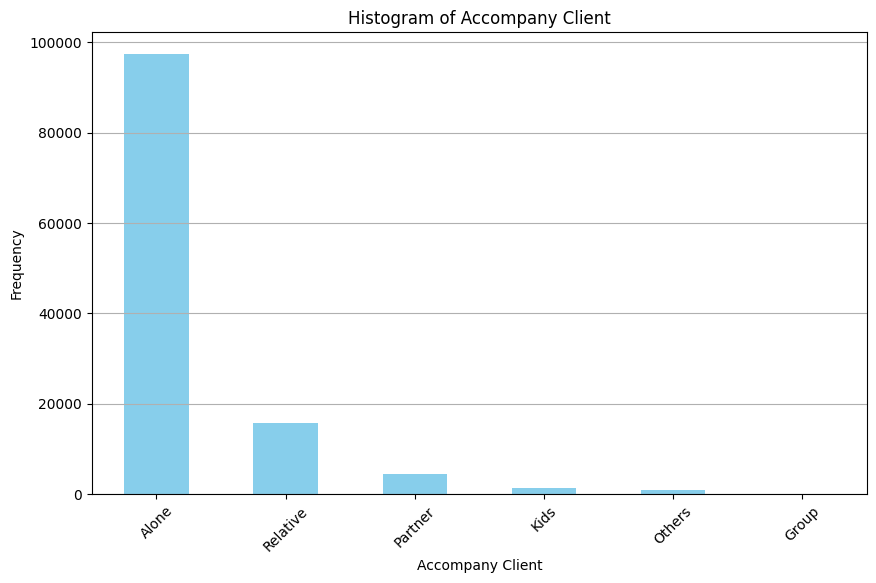

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'car' is your DataFrame
# Remove non-numeric value '##'
cleaned_data = car['Accompany_Client'].replace('##', np.nan)

# Plot histogram
plt.figure(figsize=(10, 6))
cleaned_data.value_counts().plot(kind='bar', color='skyblue')
plt.title('Histogram of Accompany Client')
plt.xlabel('Accompany Client')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.show()


In [ ]:
car['Accompany_Client'] = car['Accompany_Client'].replace('##',np.nan)

In [ ]:

import pandas as pd

# Find the most dominating value
dominating_value_Accompany_Client = car['Accompany_Client'].value_counts().idxmax()

# Replace missing values with the dominating value
car['Accompany_Client'] = car['Accompany_Client'].fillna(dominating_value_Accompany_Client)


#client_occupation

In [ ]:
car['Client_Occupation'].value_counts()

,count
Client_Occupation,
Laborers,21024
Sales,12136
Core,10611
Managers,8099
Drivers,7150
High skill tech,4317
Accountants,3766
Medicine,3172
Security,2683


In [ ]:
# mapping the  occupations to grouped occupations
def map_client_occupation(category):
    if pd.isna(category):
        return 'MV'
    elif category in ['Sales', 'Realty agents', 'Managers', 'Accountants', 'High skill tech', 'IT']:
        return 'Professional'
    elif category in ['Laborers', 'Core', 'Drivers', 'Cleaning', 'Low-skill Laborers']:
        return 'Skilled Labor'
    elif category in ['HR', 'Waiters/barmen', 'Cooking', 'Private service', 'Security', 'Secretaries']:
        return 'Service'
    elif category == 'Medicine':
        return 'Healthcare'
    else:
        return 'Other'

# Apply the function to the 'Client_Occupation' column and create a new 'Occupation_Category' column
car['Client_Occupation'] = car['Client_Occupation'].apply(map_client_occupation)

<Axes: xlabel='Client_Occupation'>

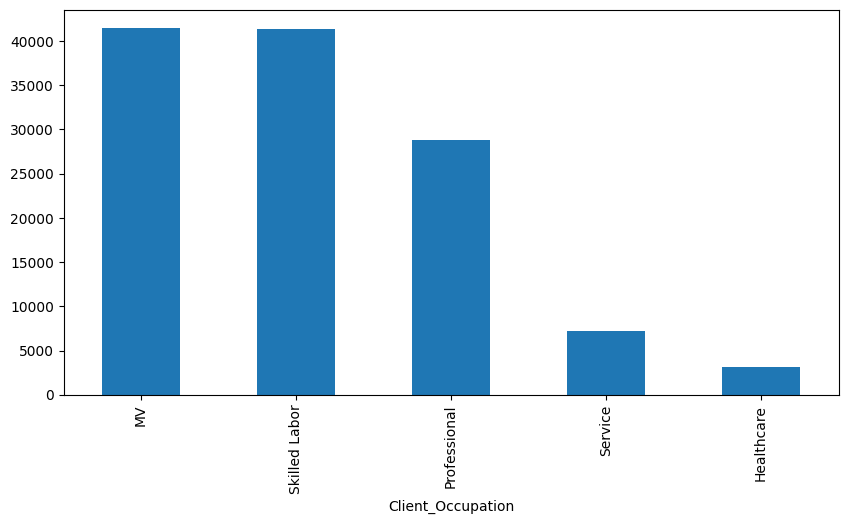

In [ ]:
plt.figure(figsize=(10,5))
car['Client_Occupation'].value_counts().plot(kind='bar')

#Client_Income_Type

In [ ]:
car['Client_Income_Type'].value_counts()

,count
Client_Income_Type,
Service,61028
Commercial,27764
Retired,21043
Govt Job,8303
Student,8
Unemployed,6
Maternity leave,2
Businessman,1


In [ ]:

mode_client_income_type = car['Client_Income_Type'].mode()[0]


car['Client_Income_Type'].fillna(mode_client_income_type, inplace=True)

#Type_Organization

In [ ]:
car['Type_Organization'].isnull().sum()

3609

In [ ]:
# mapping the organization to grouped organization
def map_organization(category):
    if pd.isna(category):
        return 'MV'
    elif category == 'XNA':
        return 'MV'
    elif category in ['Self-employed', 'Government']:
        return 'Public Sector'
    elif category in ['Business Entity Type 3', 'Business Entity Type 2', 'Business Entity Type 1', 'Construction']:
        return 'Business'
    elif category in ['Trade: type 3', 'Trade: type 7', 'Trade: type 2', 'Agriculture']:
        return 'Trade'
    elif category in ['Military', 'Medicine', 'Housing', 'Industry: type 1', 'Industry: type 11', 'Bank', 'School', 'Industry: type 9', 'Postal', 'University']:
        return 'Institution'
    elif category in ['Transport: type 4', 'Transport: type 2', 'Transport: type 3', 'Transport: type 1']:
        return 'Transport'
    else:
        return 'Other'

# Apply the function to the 'Type_Organization' column
car['Type_Organization'] = car['Type_Organization'].apply(map_organization)

<Axes: xlabel='Type_Organization'>

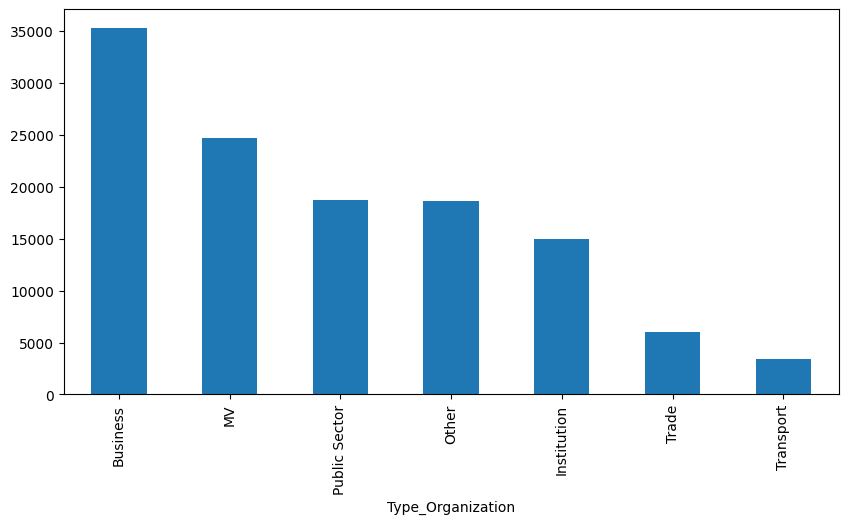

In [ ]:
plt.figure(figsize=(10,5))
car['Type_Organization'].value_counts().plot(kind='bar')

#drop mobile tag
#### its has only one 1 and other zeros

In [ ]:
car.drop(columns = 'Mobile_Tag', inplace=True)
car.shape

(121856, 39)

#AGE

In [ ]:
car['Age_Days'].isnull().sum()

3600

In [ ]:
car['Age_Days'] = car['Age_Days'].replace('x',np.nan).astype(float)


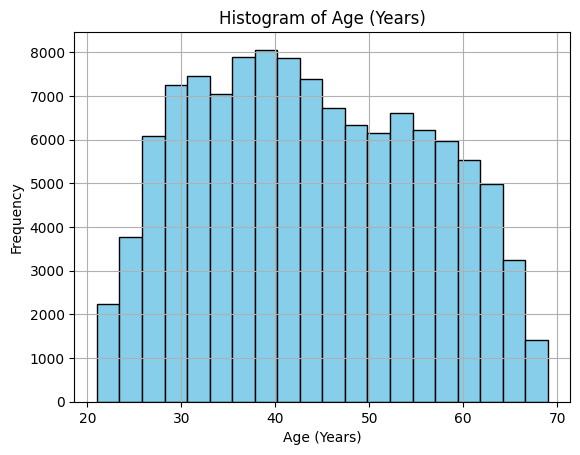

In [ ]:
import matplotlib.pyplot as plt


# Convert age from days to years
car['Age_Years'] = car['Age_Days'] / 365.25

# Plot histogram
plt.hist(car['Age_Years'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.title('Histogram of Age (Years)')
plt.grid(True)
plt.show()



In [ ]:
import pandas as pd
import numpy as np

# Assume 'df' is your DataFrame and 'age' is the column with missing values
# First, calculate the mean of the existing non-null values
age_mean = car['Age_Years'].mean()

# Now, you can fill in the missing values with the computed mean
car['Age_Years'].fillna(age_mean, inplace=True)


#Employed_Days   

In [ ]:
car['Employed_Days'] = car['Employed_Days'].replace('x',np.nan).astype(float)


In [ ]:
# Assuming you have a DataFrame named 'car' and 'Employed_Days' column has been cleaned and converted to float

# Count the number of occurrences of 365243.0 in the 'Employed_Days' column
count_365243 = car['Employed_Days'].value_counts().get(365243.0, 0)

# Print the count
print("Number of occurrences of 365243.0 in the 'Employed_Days' column:", count_365243)


Number of occurrences of 365243.0 in the 'Employed_Days' column: 21098


In [ ]:
car['Employed_Days'].head(10)

,Employed_Days
0,1062.0
1,4129.0
2,5102.0
3,365243.0
4,2977.0
5,1184.0
6,365243.0
7,365243.0
8,7889.0
9,365243.0


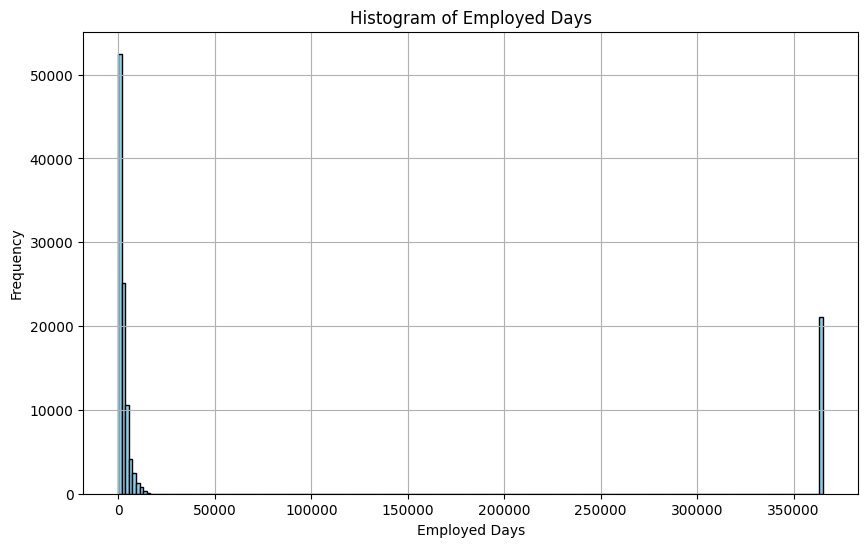

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'car'

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(car['Employed_Days'], bins=200, color='skyblue', edgecolor='black')
plt.title('Histogram of Employed Days')
plt.xlabel('Employed Days')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
# DataFrame named 'car' and you've already replaced 'x' with NaN and converted the column to float

# Count the number of values greater than 350,000 in the 'Employed_Days' column
count_greater_than_350k = (car['Employed_Days'] < 20000).sum()

# Print the count
print("Number of values less than 350,000 in the 'Employed_Days' column:", count_greater_than_350k)


Number of values less than 350,000 in the 'Employed_Days' column: 97092


In [ ]:
# Assuming you have a DataFrame named 'car' and 'Employed_Days' column has been cleaned and converted to float

# Filter the DataFrame for values less than 20,000
filtered_values = car[car['Employed_Days'] < 20000]

# Calculate the median of the filtered values
median_below_20000 = filtered_values['Employed_Days'].median()

# Print the median
print("Median for values below 20,000 in the 'Employed_Days' column:", median_below_20000)


Median for values below 20,000 in the 'Employed_Days' column: 1649.0


In [ ]:
car['Employed_Days'] = car['Employed_Days'].replace(np.nan,1649.0)

#Registration_Days  

In [ ]:
car['Registration_Days'] = car['Registration_Days'].replace('x',np.nan).astype(float)

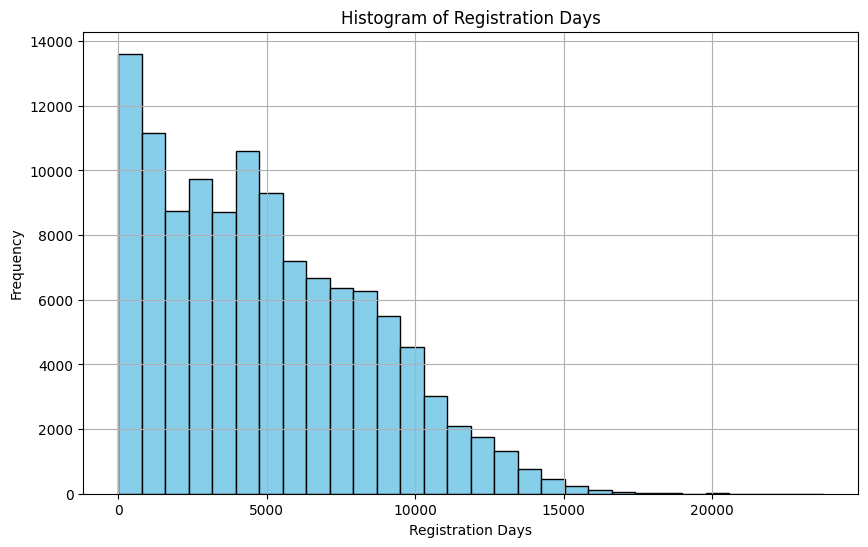

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'car'

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(car['Registration_Days'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Registration Days')
plt.xlabel('Registration Days')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
# Calculate the median of the 'Registration_Days' column excluding missing values
median_value = car['Registration_Days'].median()

# Replace missing values with the median
car['Registration_Days'].fillna(median_value, inplace=True)


#Client_Family_Members

In [ ]:
car['Client_Family_Members'].value_counts()

,count
Client_Family_Members,
2.0,61652
1.0,26213
3.0,20434
4.0,9583
5.0,1349
6.0,157
7.0,32
8.0,11
9.0,4


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

median_value_client = car['Client_Family_Members'].median()
car['Client_Family_Members'].fillna(median_value_client, inplace=True)

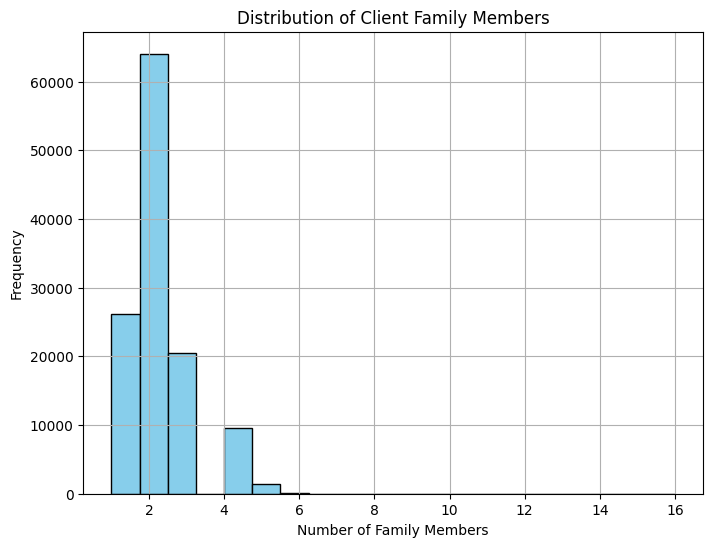

In [ ]:
# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(car['Client_Family_Members'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Client Family Members')
plt.xlabel('Number of Family Members')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#Cleint_City_Rating

In [ ]:
car['Cleint_City_Rating'].value_counts()

,count
Cleint_City_Rating,
2.0,88949
3.0,17043
1.0,13455


In [ ]:
# Calculate the mode of the 'Client_City_Rating' column
mode_Client_City_Rating = car['Cleint_City_Rating'].mode()[0]

# Replace missing values with the mode value
car['Cleint_City_Rating'].fillna(mode_Client_City_Rating, inplace=True)


#Loan_Contract_Type

In [ ]:
car['Loan_Contract_Type'].value_counts()

,count
Loan_Contract_Type,
CL,107118
RL,11087


In [ ]:
car['Loan_Contract_Type'].isnull().sum()

3651

In [ ]:
mode_value_loan = car['Loan_Contract_Type'].mode()[0]
car['Loan_Contract_Type'].fillna(mode_value_loan, inplace=True)

#Client_Housing_Type

In [ ]:
car['Client_Housing_Type'].value_counts()

,count
Client_Housing_Type,
Home,104870
Family,5783
Municipal,4248
Rental,1816
Office,1002
Shared,450


In [ ]:
# Calculate the mode of the 'Client_Housing_Type' column
mode_client_housing_type = car['Client_Housing_Type'].mode()[0]

# Replace missing values with the mode
car['Client_Housing_Type'].fillna(mode_client_housing_type, inplace=True)

#dropping the coloumns

In [ ]:
car.drop(['Score_Source_1','Score_Source_2','Score_Source_3','Social_Circle_Default','Own_House_Age','ID'], axis=1, inplace=True)

In [ ]:
car.drop(['Age_Days'], axis=1, inplace=True)

#Cleint_City_Rating

In [ ]:
car['Cleint_City_Rating'].value_counts()

,count
Cleint_City_Rating,
2.0,91358
3.0,17043
1.0,13455


In [ ]:
mode_value_Cleint_City_Rating = car['Cleint_City_Rating'].mode()[0]

# Impute missing values with the mode
car['Cleint_City_Rating'].fillna(mode_value_Cleint_City_Rating, inplace=True)

#ID_Days

In [ ]:
car['ID_Days'] = car['ID_Days'].replace(['x',''],np.nan).astype(float)

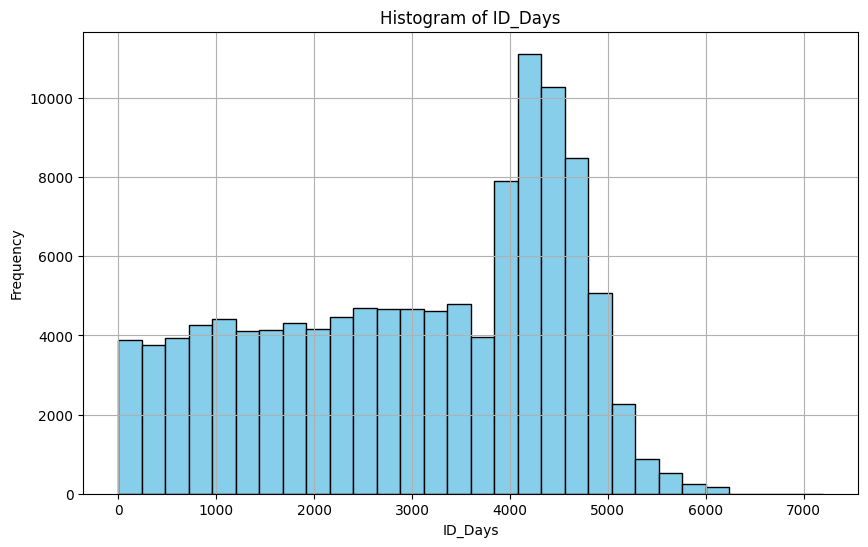

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'car'

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(car['ID_Days'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of ID_Days')
plt.xlabel('ID_Days')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
# Calculate the mean of the 'ID_Days' column excluding missing values
mean_value = car['ID_Days'].mean()

# Replace missing values with the mean
car['ID_Days'].fillna(mean_value, inplace=True)

#Type_Organization

In [ ]:
car['Type_Organization'].value_counts()

,count
Type_Organization,
Business,35341
MV,24694
Public Sector,18696
Other,18646
Institution,14969
Trade,6045
Transport,3465


#Population_Region_Relative
### has already normilized and so nothing impuation was hard for them     

In [ ]:
car['Population_Region_Relative'] = car['Population_Region_Relative'].replace(['@','','#'],np.nan).astype(float)

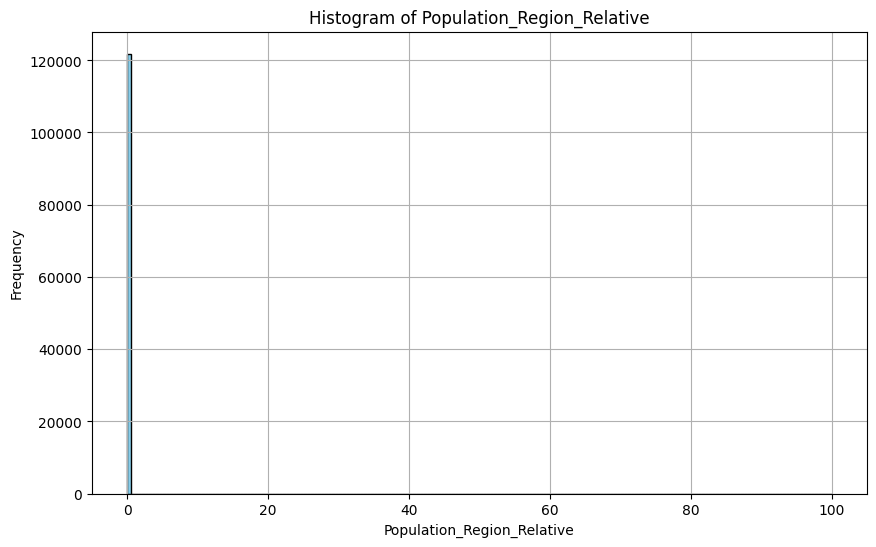

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'car'

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(car['Population_Region_Relative'], bins=200, color='skyblue', edgecolor='black')
plt.title('Histogram of Population_Region_Relative')
plt.xlabel('Population_Region_Relative')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
car['Population_Region_Relative'].isnull().sum()

0

#Credit_Bureau

In [ ]:
car['Credit_Bureau'].fillna(car['Credit_Bureau'].median(), inplace=True)

#Client_Gender

In [ ]:
car['Client_Gender'].value_counts()

,count
Client_Gender,
Male,78463
Female,40977
XNA,3


In [ ]:
car['Client_Gender'] = car['Client_Gender'].replace('XNA', np.nan)

In [ ]:

dominating_gender = car['Client_Gender'].mode()[0]

car['Client_Gender'] = car['Client_Gender'].fillna(dominating_gender)

#Client_Education

In [ ]:
car['Client_Education'].value_counts()

,count
Client_Education,
Secondary,83911
Graduation,28819
Graduation dropout,3960
Junior secondary,1455
Post Grad,66


In [ ]:

dominating_education = car['Client_Education'].mode()[0]

car['Client_Education'] = car['Client_Education'].fillna(dominating_education)


#Client_Marital_Status

In [ ]:
car['Client_Marital_Status'].value_counts()

,count
Client_Marital_Status,
M,87349
S,17404
D,7556
W,6074


In [ ]:

dominating_marital_status = car['Client_Marital_Status'].mode()[0]

car['Client_Marital_Status'] = car['Client_Marital_Status'].fillna(dominating_marital_status)

#Application_Process_Day     Application_Process_Hour   

In [ ]:
car['Application_Process_Day'] = car['Application_Process_Day'].fillna(car['Application_Process_Day'].median())
car['Application_Process_Hour'] = car['Application_Process_Hour'].fillna(car['Application_Process_Hour'].median())


#one hot encoding

In [ ]:
#seperating the coloumns ehich are of object type
object_col=[]
for i in car.columns:
  if car[i].dtype=='object':
    object_col.append(i)

print(object_col)

['Accompany_Client', 'Client_Income_Type', 'Client_Education', 'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type', 'Client_Occupation', 'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag', 'Type_Organization']


In [ ]:
# Initialize an empty dictionary to store category labels
label_mapping ={}
#using the label encoding for those coloumns
for col in car.select_dtypes(include=['object']).columns:

    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    # Fit the encoder to the unique values in the column
    label_encoder.fit(car[col].unique())

    # Transform the column using the encoder
    car[col] = label_encoder.transform(car[col])
# Store the mapping of column name to label encoding in the dictionary
    label_mapping[col] = label_encoder.classes_

# Print the label mapping for each column
for col, labels in label_mapping.items():
    print(f"{col} labels: {labels}")
    # Print the column name and the unique encoded values
    print(f"{col}: {car[col].unique()}")

Accompany_Client labels: ['Alone' 'Group' 'Kids' 'Others' 'Partner' 'Relative']
Accompany_Client: [0 5 3 2 4 1]
Client_Income_Type labels: ['Businessman' 'Commercial' 'Govt Job' 'Maternity leave' 'Retired'
 'Service' 'Student' 'Unemployed']
Client_Income_Type: [1 5 4 2 6 7 3 0]
Client_Education labels: ['Graduation' 'Graduation dropout' 'Junior secondary' 'Post Grad'
 'Secondary']
Client_Education: [4 0 1 2 3]
Client_Marital_Status labels: ['D' 'M' 'S' 'W']
Client_Marital_Status: [1 3 2 0]
Client_Gender labels: ['Female' 'Male']
Client_Gender: [1 0]
Loan_Contract_Type labels: ['CL' 'RL']
Loan_Contract_Type: [0 1]
Client_Housing_Type labels: ['Family' 'Home' 'Municipal' 'Office' 'Rental' 'Shared']
Client_Housing_Type: [1 0 3 2 4 5]
Client_Occupation labels: ['Healthcare' 'MV' 'Professional' 'Service' 'Skilled Labor']
Client_Occupation: [2 1 4 3 0]
Client_Permanent_Match_Tag labels: ['No' 'Yes']
Client_Permanent_Match_Tag: [1 0]
Client_Contact_Work_Tag labels: ['No' 'Yes']
Client_Contact

In [ ]:
from sklearn.model_selection import train_test_split

X = car.drop('Default', axis=1)  # Features
y = car['Default']  # Target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a DataFrame with the target variable
df_target = pd.DataFrame(y, columns=['Default'])

# Count the number of samples in each class
class_counts = df_target['Default'].value_counts()

# Calculate the class imbalance ratio
imbalance_ratio = class_counts[1] / class_counts[0]

# Print the class counts and imbalance ratio
print("Class Counts:")
print(class_counts)
print("\nImbalance Ratio (1's to 0's):", imbalance_ratio)

Class Counts:
Default
0    112011
1      9845
Name: count, dtype: int64

Imbalance Ratio (1's to 0's): 0.08789315335101017


In [ ]:

!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
# Create the SMOTE object
smote = SMOTE(random_state=0)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
car.shape

(121856, 33)

In [ ]:
class_counts_resampled = pd.Series(y_train_resampled).value_counts()
imbalance_ratio_resampled = class_counts_resampled[1] / class_counts_resampled[0]

print("Class Counts After SMOTE:")
print(class_counts_resampled)
print("\nImbalance Ratio After SMOTE:", imbalance_ratio_resampled)

Class Counts After SMOTE:
Default
0    89674
1    89674
Name: count, dtype: int64

Imbalance Ratio After SMOTE: 1.0


In [ ]:
X_train_resampled = car.drop('Default', axis=1)
y_train_resampled = car['Default']
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled,y_train_resampled, test_size=0.2,random_state=0)

In [ ]:
from scipy import stats
# Calculate the Z-scores for each column in X
z_scores = np.abs(stats.zscore(X_train))

# Define a threshold for Z-scores (e.g., 3)
threshold = 3

# Create a boolean mask for outliers
outlier_mask = (z_scores < threshold).all(axis=1)

# Filter the training set to remove outliers
X_train_no_outliers = X_train[outlier_mask]
y_train_no_outliers = y_train[outlier_mask]

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=0, max_depth=9, min_samples_leaf=2, min_samples_split=3, class_weight='balanced')
dtree.fit(X_train_no_outliers, y_train_no_outliers)

DecisionTreeClassifier(class_weight='balanced', max_depth=9, min_samples_leaf=2,
                       min_samples_split=3, random_state=0)

In [ ]:
y_pred = dtree.predict(X_test)

In [ ]:
# ROC AUC Score
from sklearn.metrics import roc_auc_score

y_proba = dtree.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {roc_auc:.2f}")

ROC AUC Score: 0.63


In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[14037  8300]
 [  864  1171]]


In [ ]:
# Accuracy
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

Accuracy: 0.62
F1 Score: 0.20
Precision: 0.12
Recall: 0.58


RMSE & misclassification rate

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming `model` is your trained machine learning model

# Predict the target variable for the test set
y_pred = dtree.predict(X_test)

# Calculate the misclassification rate
misclassification_rate = 1 - accuracy_score(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Misclassification Rate: {misclassification_rate}")
print(f"RMSE: {rmse}")


Misclassification Rate: 0.3760052519284425
RMSE: 0.6131926711307324


Feature ranking:
1. Feature 16 (Employed_Days): 0.17853976848231518
2. Feature 18 (ID_Days): 0.12422298760494271
3. Feature 31 (Age_Years): 0.1118641249704283
4. Feature 29 (Phone_Change): 0.08201894306565033
5. Feature 7 (Loan_Annuity): 0.0812422619176714
6. Feature 10 (Client_Education): 0.07731957948463085
7. Feature 6 (Credit_Amount): 0.0707635975158421
8. Feature 17 (Registration_Days): 0.04482607193574982
9. Feature 15 (Population_Region_Relative): 0.035795416456375524
10. Feature 25 (Application_Process_Hour): 0.02547672637440747
11. Feature 0 (Client_Income): 0.02419420080791076
12. Feature 23 (Cleint_City_Rating): 0.02307074469954082
13. Feature 12 (Client_Gender): 0.019585070081239112
14. Feature 24 (Application_Process_Day): 0.01535192761154188
15. Feature 1 (Car_Owned): 0.015131068366900641
16. Feature 21 (Client_Occupation): 0.013038647432410103
17. Feature 11 (Client_Marital_Status): 0.009851908424446906
18. Feature 28 (Type_Organization): 0.009229168853780511
19. Feature

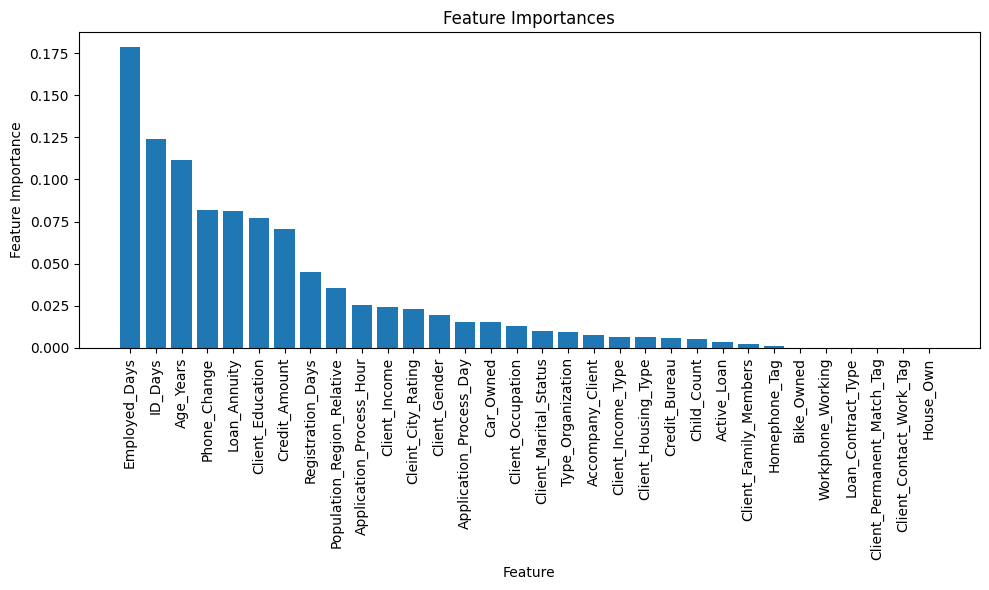

In [ ]:
# Assuming 'dtree' is the name of your trained decision tree model
importances = dtree.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):  # Assuming X contains your features
    print(f"{f + 1}. Feature {indices[f]} ({X.columns[indices[f]]}): {importances[indices[f]]}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)  # Set feature names and rotate them for better readability
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


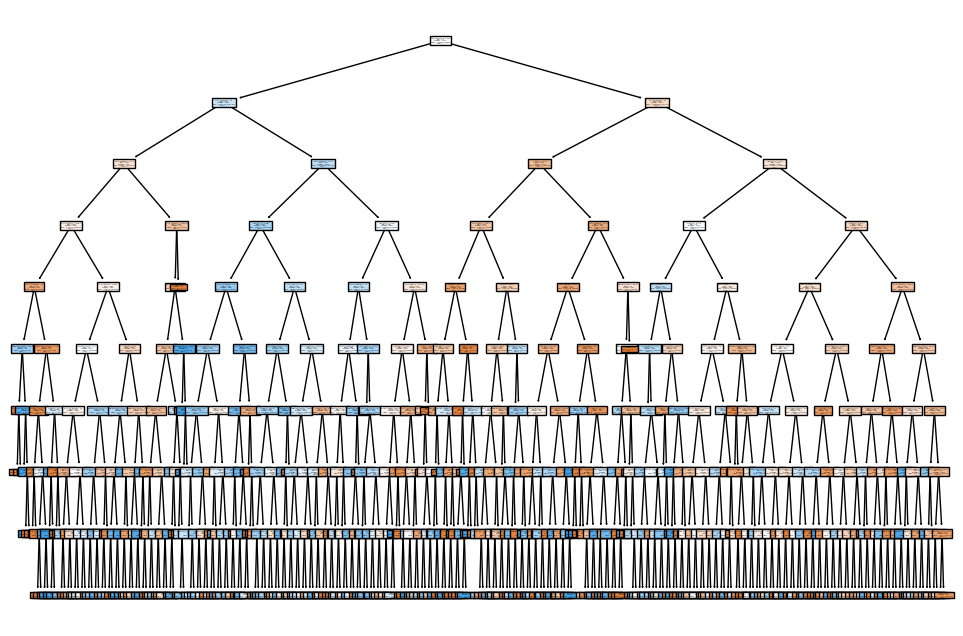

In [ ]:
# Plot Decision Tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(dtree, filled=True, feature_names=X_train_no_outliers.columns, class_names=["0", "1"])
plt.show()

In [ ]:
# 'dtree' is the name of the trained decision tree model
importances = dtree.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")
impt_cols=[]
for f in range(X.shape[1]):  # Assuming X contains your features
    # print(f"{f + 1}. Feature {indices[f]} ({X.columns[indices[f]]}): {importances[indices[f]]}")
    if importances[indices[f]] <0.05:
      break
    else:
      impt_cols.append(X.columns[indices[f]])


impt_cols

Feature ranking:


['Employed_Days',
 'ID_Days',
 'Age_Years',
 'Phone_Change',
 'Loan_Annuity',
 'Client_Education',
 'Credit_Amount']

In [ ]:
impt_cols.append("Client_Occupation")

In [ ]:
X_train_no_outliers_impt =  X_train_no_outliers[impt_cols]
dtree_enhanced = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_leaf=2, min_samples_split=3, class_weight='balanced')
dtree_enhanced.fit(X_train_no_outliers_impt, y_train_no_outliers)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=2,
                       min_samples_split=3, random_state=0)

Feature ranking:
1. Feature 0 (Client_Income): 0.33796537336043714
2. Feature 5 (Child_Count): 0.18502363260546362
3. Feature 3 (Active_Loan): 0.1510892343731777
4. Feature 2 (Bike_Owned): 0.12942394175692634
5. Feature 1 (Car_Owned): 0.10850537690802543
6. Feature 6 (Credit_Amount): 0.05482091169395928
7. Feature 4 (House_Own): 0.022424199018779338
8. Feature 7 (Loan_Annuity): 0.010747330283231198


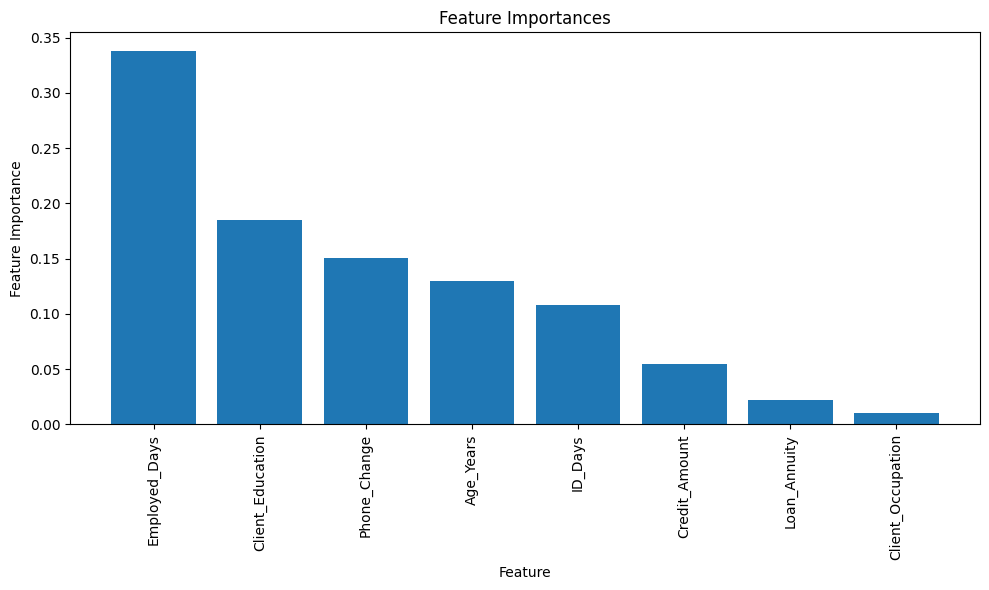

In [ ]:
# Assuming 'dtree' is the name of your trained decision tree model
importances = dtree_enhanced.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(X_train_no_outliers_impt.shape[1]):  # Assuming X contains your features
    print(f"{f + 1}. Feature {indices[f]} ({X.columns[indices[f]]}): {importances[indices[f]]}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train_no_outliers_impt.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_no_outliers_impt.shape[1]), X_train_no_outliers_impt.columns[indices], rotation=90)  # Set feature names and rotate them for better readability
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [ ]:
# Get the number of features
n_features = X_train_no_outliers_impt.shape[1]  # Assuming X contains your features

# Get the tree structure
tree_structure = dtree_enhanced.tree_

# Function to recursively print the tree structure
def print_tree(node, depth=0):
    if tree_structure.feature[node] != -2:  # If node is not a leaf
        feature_name = X_train_no_outliers_impt.columns[tree_structure.feature[node]]
        threshold = tree_structure.threshold[node]
        print(f"{'  ' * depth}if {feature_name} <= {threshold}:")
        print_tree(tree_structure.children_left[node], depth + 1)
        print(f"{'  ' * depth}else:")
        print_tree(tree_structure.children_right[node], depth + 1)
    else:  # If node is a leaf
        print(f"{'  ' * depth}class {np.argmax(tree_structure.value[node])}")

# Print the tree structure
print_tree(0)  # Start from the root node (index 0)


if Employed_Days <= 2015.5:
  if Client_Education <= 0.5:
    if Phone_Change <= 1561.5:
      if Credit_Amount <= 15636.150390625:
        if Credit_Amount <= 4873.5:
          class 1
        else:
          class 0
      else:
        if Credit_Amount <= 75496.5:
          class 1
        else:
          class 0
    else:
      if Credit_Amount <= 129092.625:
        if Employed_Days <= 2000.0:
          class 0
        else:
          class 1
      else:
        class 0
  else:
    if Phone_Change <= 1039.5:
      if Age_Years <= 36.584529876708984:
        if Credit_Amount <= 110160.44921875:
          class 1
        else:
          class 0
      else:
        if ID_Days <= 4571.5:
          class 1
        else:
          class 0
    else:
      if Age_Years <= 39.92744827270508:
        if Client_Occupation <= 2.5:
          class 1
        else:
          class 1
      else:
        if Loan_Annuity <= 4343.625:
          class 0
        else:
          class 0
else:
  if Clien

#xgboost

In [ ]:
!pip install xgboost
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(
    n_estimators=100,  # Number of boosting rounds (you can adjust this)
    max_depth=6,       # Maximum depth of each tree
    learning_rate=0.1, # Step size shrinkage
    subsample=0.8,     # Fraction of samples used for fitting trees
    colsample_bytree=0.8,  # Fraction of features used for fitting trees
    random_state=0
)

In [ ]:
xgb_classifier.fit(X_train_no_outliers, y_train_no_outliers)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [ ]:
y_pred = xgb_classifier.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9165846052847529


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming `model` is your trained machine learning model

# Predict the target variable for the test set
y_pred = xgb_classifier.predict(X_test)

# Calculate the misclassification rate
misclassification_rate = 1 - accuracy_score(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Misclassification Rate: {misclassification_rate}")
print(f"RMSE: {rmse}")


Misclassification Rate: 0.08341539471524706
RMSE: 0.28881723410358845


In [ ]:
# ROC AUC Score
from sklearn.metrics import roc_auc_score

y_proba = xgb_classifier.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {roc_auc:.2f}")

ROC AUC Score: 0.69


In [ ]:

confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[22336     1]
 [ 2032     3]]


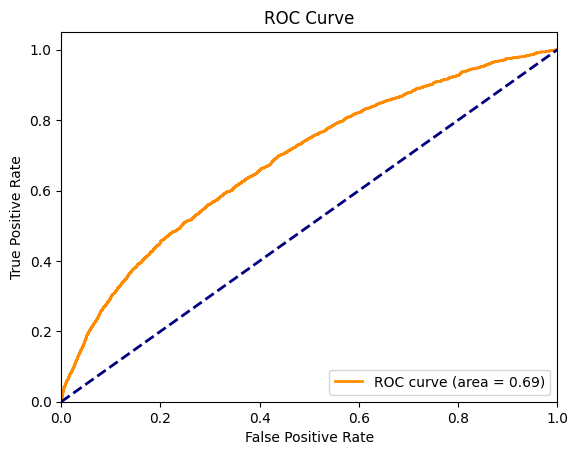

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = xgb_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
roc_auc
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Feature ranking:
1. Feature 10 (Client_Education): 0.08894628286361694
2. Feature 16 (Employed_Days): 0.051308173686265945
3. Feature 12 (Client_Gender): 0.05105399340391159
4. Feature 1 (Car_Owned): 0.050707895308732986
5. Feature 23 (Cleint_City_Rating): 0.04530882090330124
6. Feature 27 (Client_Contact_Work_Tag): 0.038229234516620636
7. Feature 31 (Age_Years): 0.033873457461595535
8. Feature 6 (Credit_Amount): 0.033752039074897766
9. Feature 9 (Client_Income_Type): 0.03219851106405258
10. Feature 29 (Phone_Change): 0.03204447031021118
11. Feature 14 (Client_Housing_Type): 0.030433453619480133
12. Feature 22 (Client_Family_Members): 0.030103597790002823
13. Feature 7 (Loan_Annuity): 0.02986498363316059
14. Feature 18 (ID_Days): 0.02977258898317814
15. Feature 20 (Workphone_Working): 0.02941925823688507
16. Feature 15 (Population_Region_Relative): 0.028488775715231895
17. Feature 17 (Registration_Days): 0.02827410399913788
18. Feature 2 (Bike_Owned): 0.027970723807811737
19. Feature 2

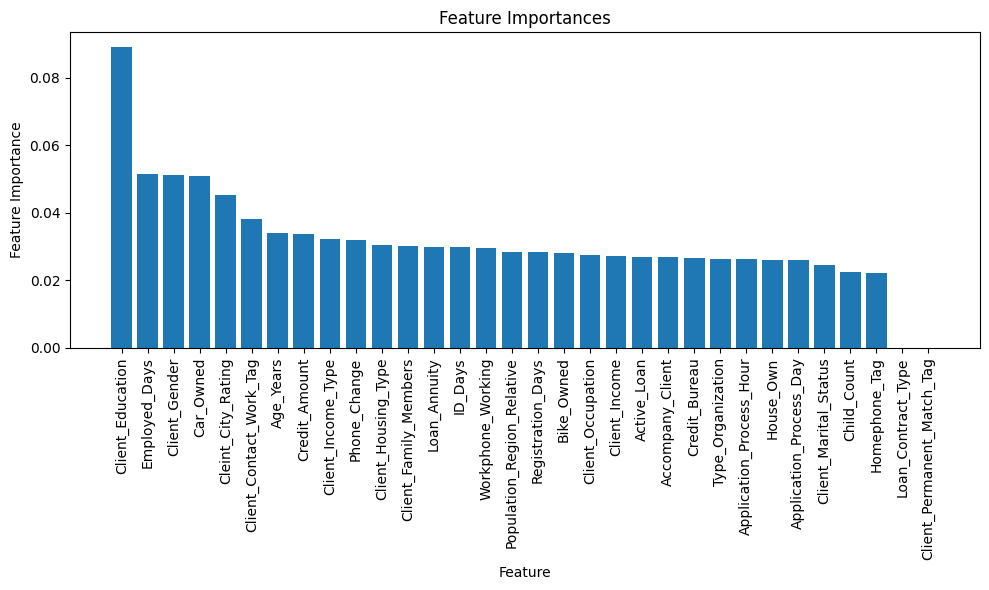

In [ ]:
import xgboost as xgb

# Assuming 'xgb_model' is the name of your trained XGBoost model
# Access feature importance
importances = xgb_classifier.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):  # Assuming X contains your features
    print(f"{f + 1}. Feature {indices[f]} ({X.columns[indices[f]]}): {importances[indices[f]]}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)  # Set feature names and rotate them for better readability
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

#random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=0)
rf_classifier.fit(X_train_no_outliers, y_train_no_outliers)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred_rf = rf_classifier.predict(X_test)

In [ ]:

confusion_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix (Random Forest):")
print(confusion_rf)

Confusion Matrix (Random Forest):
[[22337     0]
 [ 1879   156]]


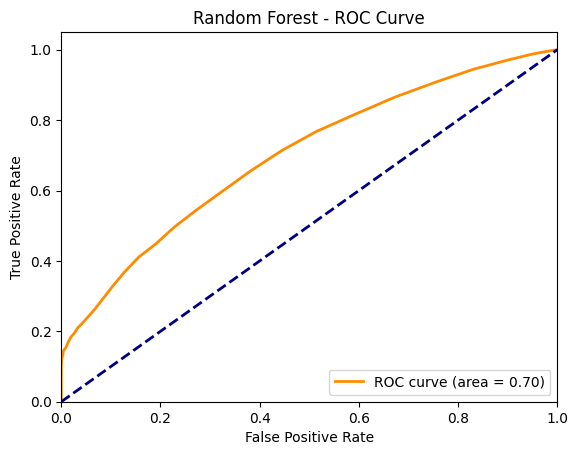

In [ ]:
y_pred_proba_rf = rf_classifier.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest - ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print the accuracy
print("Accuracy (Random Forest):", accuracy_rf)

Accuracy (Random Forest): 0.9229033316921057


In [ ]:
# Feature importances
feature_importances_rf = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
importance_df_rf = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_rf})
importance_df_rf = importance_df_rf.sort_values(by='Importance', ascending=False)

# Display feature importances
print(importance_df_rf)

                       Feature  Importance
31                   Age_Years    0.082061
17           Registration_Days    0.081072
18                     ID_Days    0.079670
7                 Loan_Annuity    0.075529
16               Employed_Days    0.073162
29                Phone_Change    0.072217
6                Credit_Amount    0.069729
15  Population_Region_Relative    0.060332
0                Client_Income    0.058496
25    Application_Process_Hour    0.048897
24     Application_Process_Day    0.035967
30               Credit_Bureau    0.032769
28           Type_Organization    0.027679
21           Client_Occupation    0.019897
22       Client_Family_Members    0.018093
11       Client_Marital_Status    0.015923
3                  Active_Loan    0.012609
8             Accompany_Client    0.012375
9           Client_Income_Type    0.012103
5                  Child_Count    0.011677
23          Cleint_City_Rating    0.011624
2                   Bike_Owned    0.011584
10         

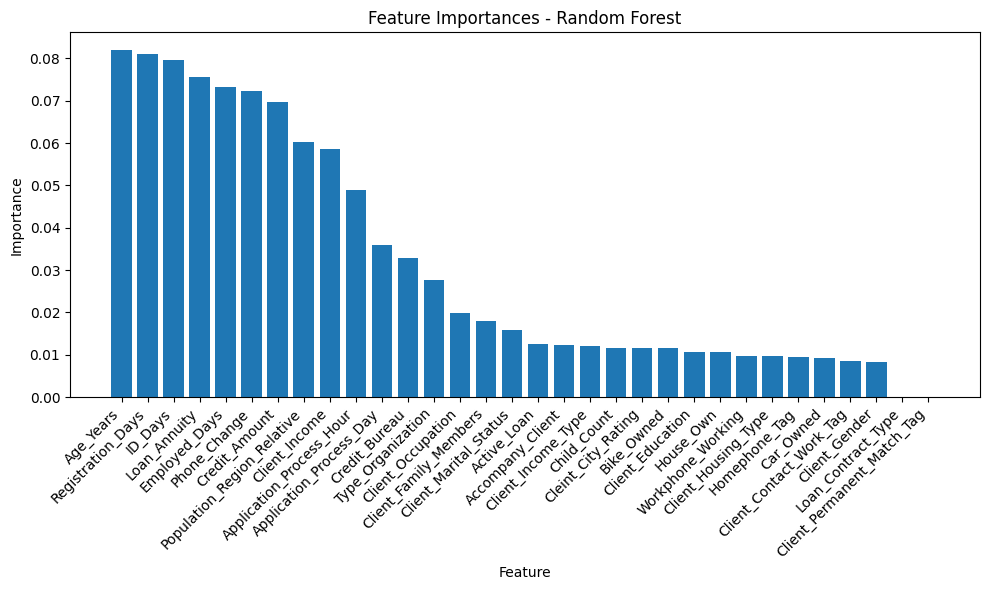

In [ ]:
import matplotlib.pyplot as plt

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.bar(importance_df_rf['Feature'], importance_df_rf['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances - Random Forest')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
# ROC AUC Score
from sklearn.metrics import roc_auc_score

y_proba = rf_classifier.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {roc_auc:.2f}")

ROC AUC Score: 0.70


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming `model` is your trained machine learning model

# Predict the target variable for the test set
y_pred = rf_classifier.predict(X_test)

# Calculate the misclassification rate
misclassification_rate = 1 - accuracy_score(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Misclassification Rate: {misclassification_rate}")
print(f"RMSE: {rmse}")


Misclassification Rate: 0.0770966683078943
RMSE: 0.2776628680754672


#logistic regression

In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import statsmodels.api as sm


# Assuming your target variable is named 'target', and features are all other columns
X = car.drop('Default', axis=1)  # Features
y = car['Default']  # Target variable


# Initializing the logistic regression model
model = LogisticRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions on the testing set
predictions = model.predict(X_test)

# Calculating the accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Adding constant for intercept term
X_train = sm.add_constant(X_train)

# Fitting logistic regression model with statsmodels
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# Getting p-values for each coefficient
p_values = result.pvalues
print("P-values:", p_values)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9165025439028394
Optimization terminated successfully.
         Current function value: 0.267502
         Iterations 7
P-values: const                         9.783841e-38
Client_Income                 3.612265e-01
Car_Owned                     9.357608e-28
Bike_Owned                    7.919765e-01
Active_Loan                   7.345231e-01
House_Own                     1.287838e-02
Child_Count                   6.184186e-02
Credit_Amount                 1.018873e-07
Loan_Annuity                  3.674690e-05
Accompany_Client              1.918892e-03
Client_Income_Type            4.940174e-06
Client_Education              1.656609e-61
Client_Marital_Status         7.545369e-02
Client_Gender                 1.174691e-34
Loan_Contract_Type            1.240221e-21
Client_Housing_Type           5.566864e-02
Population_Region_Relative    5.218132e-01
Employed_Days                 2.574863e-01
Registration_Days             3.199495e-04
ID_Days                       1.051333e-25

In [ ]:
p_values_df=pd.DataFrame(p_values,columns=['p_value']).reset_index()
p_values_df[p_values_df['p_value']<0.05]['index']

,index
0,const
2,Car_Owned
5,House_Own
7,Credit_Amount
8,Loan_Annuity
9,Accompany_Client
10,Client_Income_Type
11,Client_Education
13,Client_Gender
14,Loan_Contract_Type
